Nivell 2
- Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

Nivell 3
- Exercici 3
En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
os.getcwd()

'/Users/omarassila/Documents/TheSchool/IT_academy/DataScienceIT/Sprint3/S03T02'

In [3]:
os.chdir('/Users/omarassila/Documents/TheSchool/IT_academy/DataScienceIT/Data-Science-main/Pre-processing-data')

In [4]:
os.listdir()

['01 INTRODUCTION TO VARIABLES.ipynb',
 '.DS_Store',
 'movies.dat',
 '013 Python Regular Expression.ipynb',
 'uforeports.csv',
 '007 Formatear Strings.ipynb',
 'README.md',
 '.ipynb_checkpoints',
 'movies_viz.csv']

In [5]:
mheader = ['movie_id','title','genre']

In [6]:
pd.options.display.max_columns = None

movies = pd.read_table('movies.dat',
                       sep = '::',
                       header = None,
                       names = mheader,
                       engine = 'python',
                       encoding='ISO-8859-1',
                       nrows= 4000)
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
import re 
pattern = r"\(([1-2][0-9][0-9][0-9])\)"
movies['year']= movies['title'].apply(lambda x: int(re.search(pattern,x).group(1)))

pattern = r" +\(.*\)"
movies['title']=movies['title'].apply(lambda x: re.sub(pattern,"",x))


movies.sample(3)

,movie_id,title,genre,year
2014,2083,"Muppet Christmas Carol, The",Children's|Musical,1992
1919,1988,Hello Mary Lou: Prom Night II,Horror,1987
816,827,"Convent, The",Drama,1995


In [8]:
dummy_df = movies.genre.str.get_dummies(sep='|')
dummy_df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
movies.shape

(3883, 4)

In [10]:
movies = movies.join(dummy_df, lsuffix="DROP")

In [11]:
#movies['year'] = pd.to_datetime(movies['year'])

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     3883 non-null   int64 
 1   title        3883 non-null   object
 2   genre        3883 non-null   object
 3   year         3883 non-null   int64 
 4   Action       3883 non-null   int64 
 5   Adventure    3883 non-null   int64 
 6   Animation    3883 non-null   int64 
 7   Children's   3883 non-null   int64 
 8   Comedy       3883 non-null   int64 
 9   Crime        3883 non-null   int64 
 10  Documentary  3883 non-null   int64 
 11  Drama        3883 non-null   int64 
 12  Fantasy      3883 non-null   int64 
 13  Film-Noir    3883 non-null   int64 
 14  Horror       3883 non-null   int64 
 15  Musical      3883 non-null   int64 
 16  Mystery      3883 non-null   int64 
 17  Romance      3883 non-null   int64 
 18  Sci-Fi       3883 non-null   int64 
 19  Thriller     3883 non-null 

In [13]:
data_year = movies.groupby('year').sum()
data_year = data_year.drop('movie_id', axis = 1)
data_year.reset_index()


,year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1,1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1996,37,22,7,20,115,23,19,150,5,2,12,7,6,48,14,45,8,1
77,1997,43,22,6,22,98,26,11,139,6,2,10,5,15,52,18,55,10,0
78,1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,5,1
79,1999,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1


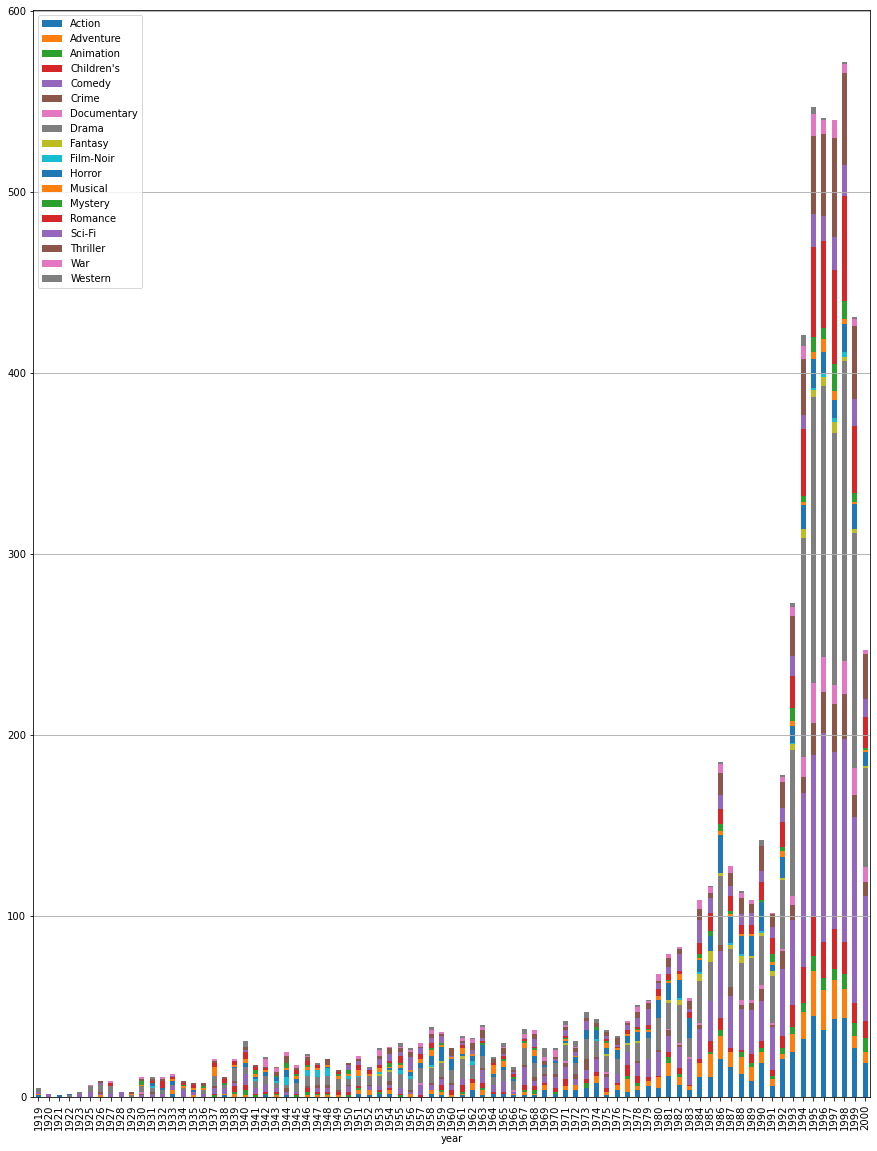

In [14]:
data_year.plot(kind='bar', stacked= True, figsize = (15,20))
plt.grid(axis = 'y', linewidth = 0.9)

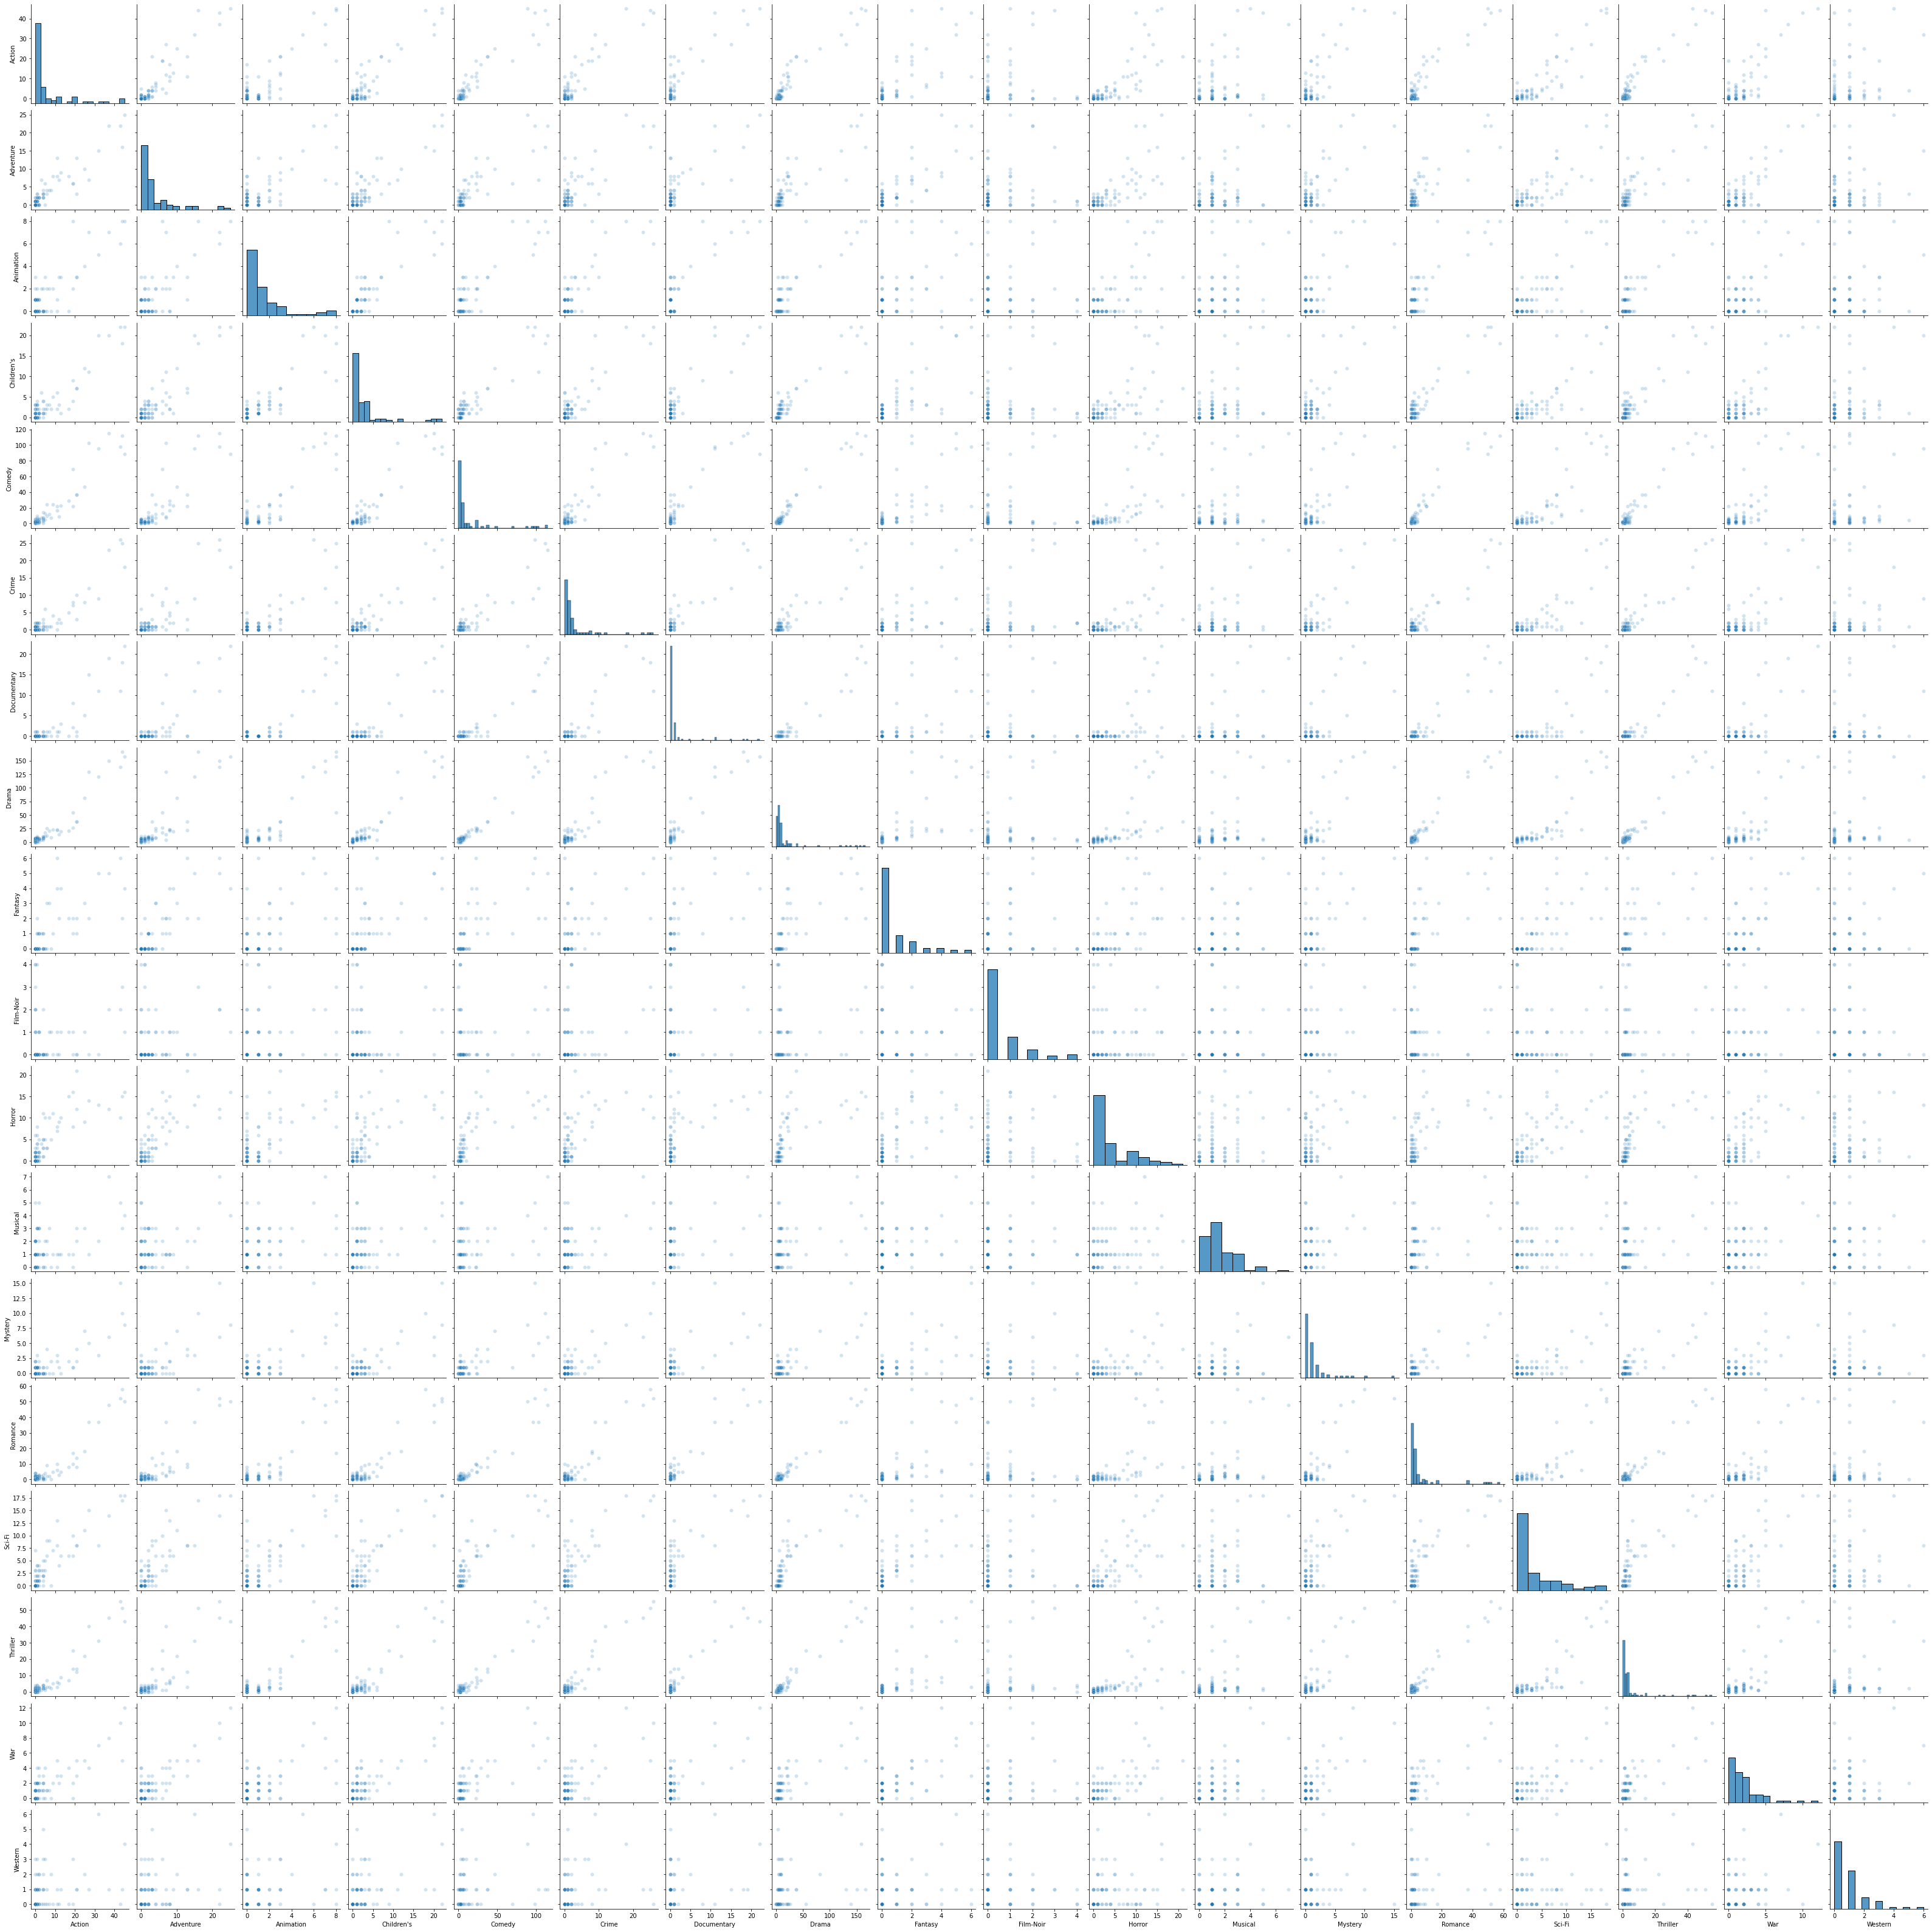

In [15]:
sns.pairplot(data_year, diag_kind='hist', plot_kws={'alpha': 0.2})

In [16]:
movies

,movie_id,title,genre,year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Animation|Children's|Comedy,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama,1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream,Drama,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland,Drama,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House,Drama,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
df=data_year.sum().sort_values()

<AxesSubplot:>

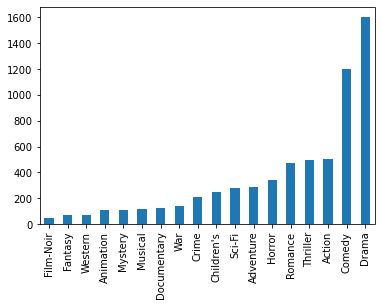

In [18]:
df.plot(kind='bar')

In [19]:
movies['year'].describe()

count    3883.000000
mean     1986.066959
std        16.895690
min      1919.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: year, dtype: float64

In [20]:
bins = list(range((movies['year'].min()-10),movies['year'].max(), 10))
decades = [(str(x+1)[2:] + "s") for x in bins]
decades.pop()
decades

['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

In [21]:
movies_decades= movies.reset_index(inplace=False)
movies_decades['year'] = pd.cut(movies_decades.year, bins , labels=decades)
movies_decades.rename(columns={'year':'decade'},inplace=True)

movies_decades

,index,movie_id,title,genre,decade,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,Toy Story,Animation|Children's|Comedy,90s,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,Jumanji,Adventure|Children's|Fantasy,90s,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,3,Grumpier Old Men,Comedy|Romance,90s,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,4,Waiting to Exhale,Comedy|Drama,90s,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,5,Father of the Bride Part II,Comedy,90s,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3878,3948,Meet the Parents,Comedy,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3879,3949,Requiem for a Dream,Drama,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3880,3950,Tigerland,Drama,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3881,3951,Two Family House,Drama,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [22]:
movies_decades = movies_decades.groupby('decade')[movies_decades.columns].sum()
movies_decades

,index,movie_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,
10s,8569,8776,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
20s,89068,91309,1,1,0,0,13,1,0,14,0,0,1,1,0,2,1,2,2,0
30s,143444,146857,3,6,2,4,23,4,1,26,0,1,7,11,5,15,1,9,5,1
40s,271484,277514,2,6,11,13,22,8,0,44,0,17,14,14,9,14,1,17,11,7
50s,383310,391705,10,13,5,10,25,7,1,62,4,9,20,17,7,18,32,16,13,7
60s,475495,486166,17,16,5,20,41,6,1,69,2,2,26,19,5,10,13,24,13,16
70s,628115,642306,41,26,8,25,63,17,2,84,4,1,35,9,6,8,31,22,11,15
80s,1469615,1505132,110,78,14,31,200,21,9,211,24,4,112,12,12,54,66,55,31,3
90s,3505968,3589405,299,130,52,139,743,139,105,1036,33,10,120,30,61,333,121,322,55,19


In [23]:
movies_decades = movies_decades.drop(['index','movie_id'], axis=1) 
mov = movies_decades.reset_index(drop=False)
mov.columns

Index(['decade', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

<AxesSubplot:>

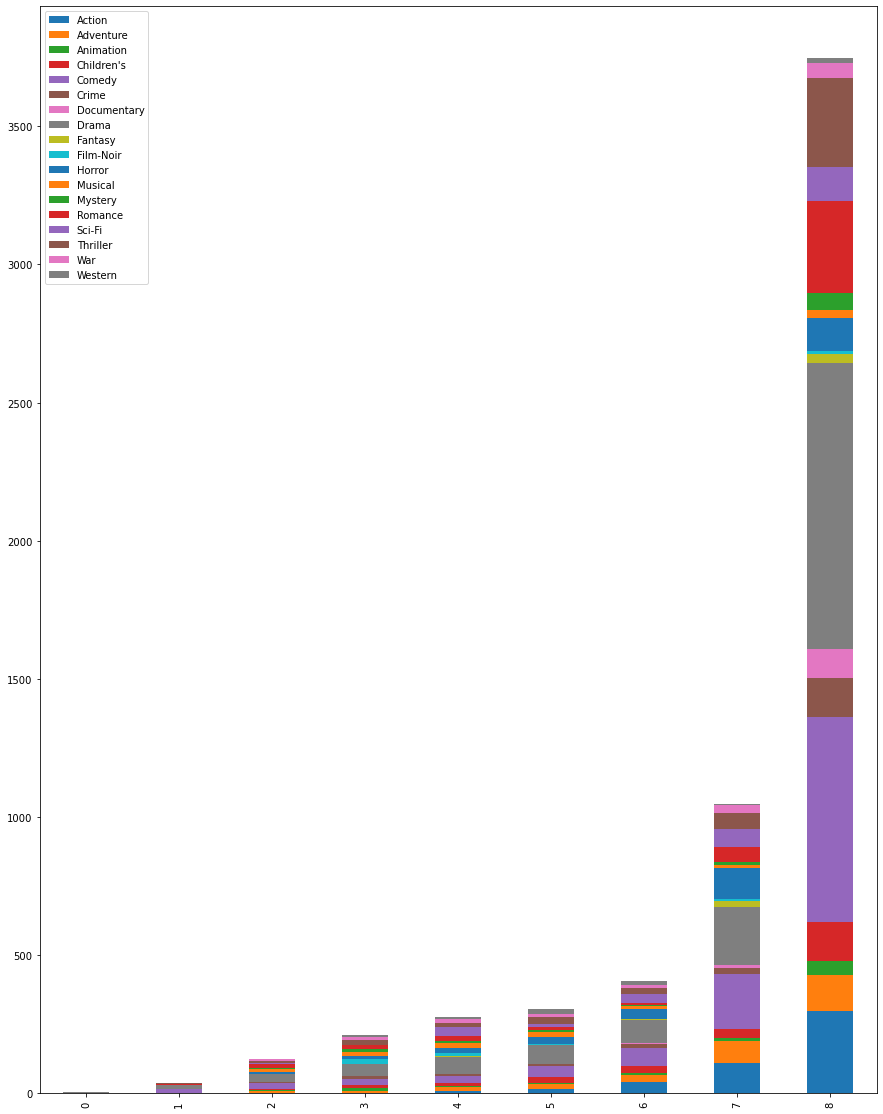

In [24]:
mov.plot(kind = 'bar', stacked= True, figsize = (15,20))
                
                

<AxesSubplot:title={'center':'Movie genre over the decades'}>

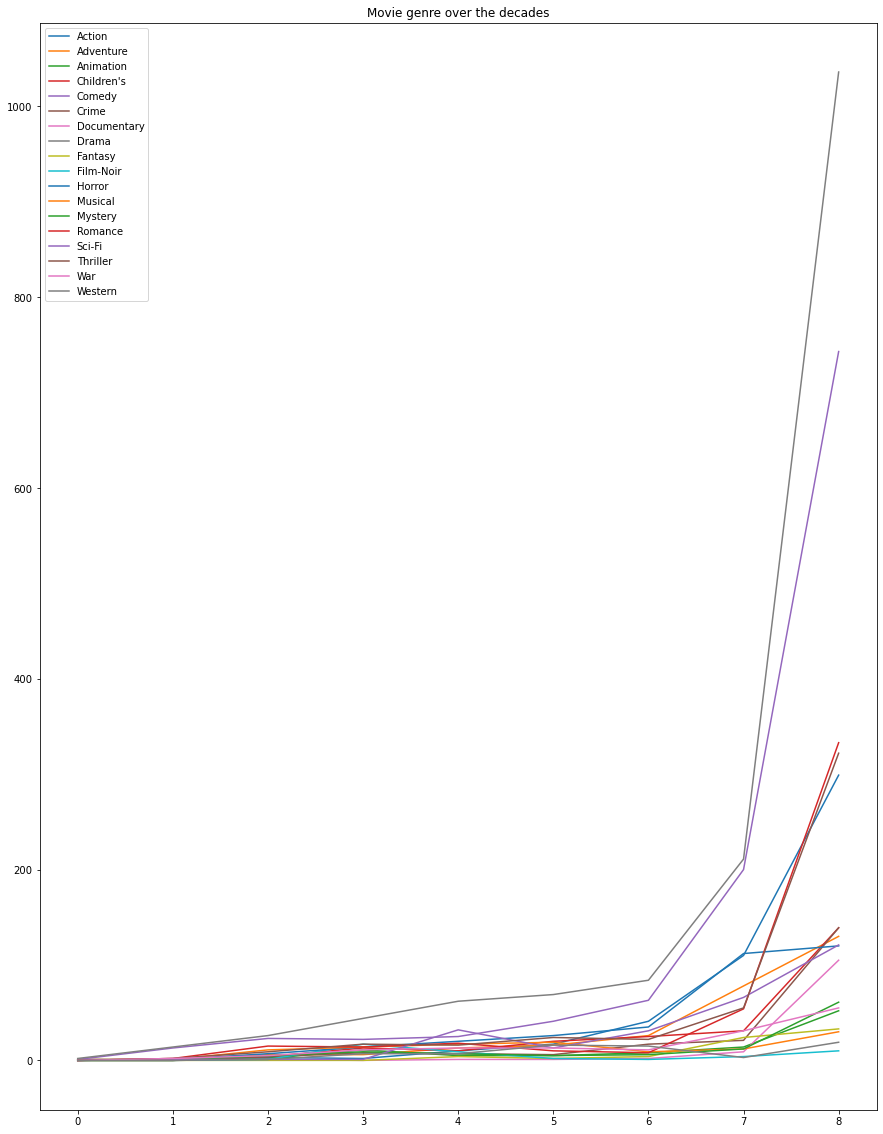

In [26]:
mov.plot(kind='line',title="Movie genre over the decades", figsize = (15,20))

In [27]:

sns.relplot(data=mov.transpose(),height=12, aspect=2, kind='line')


TypeError: 'NoneType' object is not iterable

(0.0, 90.0)

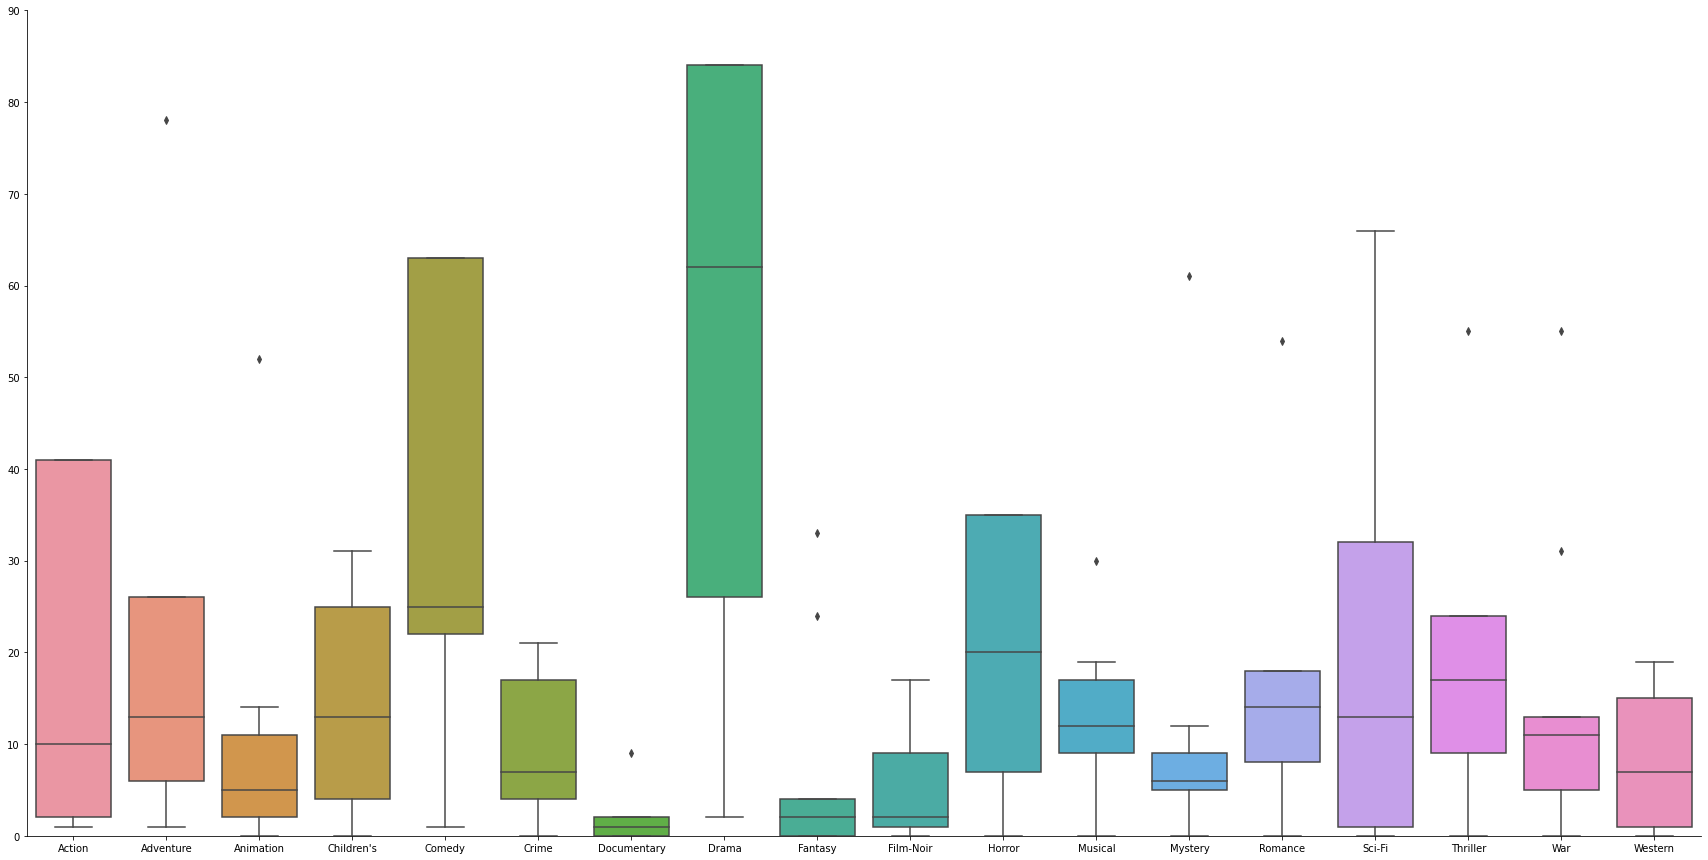

In [28]:
sns.catplot(data=mov,kind='box',height=12, aspect=2)
plt.ylim(0,90)

In [31]:
sns.relplot(data=mov,x='decade',height=12, aspect=0,9)
plt.figure(figsize=(15,12)) 

SyntaxError: positional argument follows keyword argument (548573899.py, line 1)

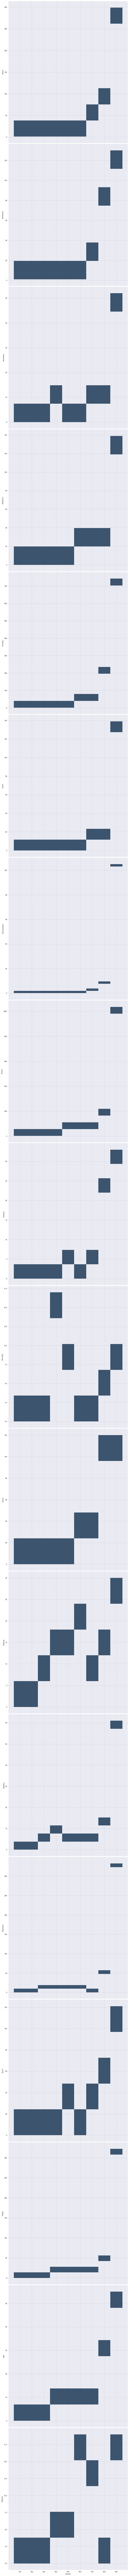

In [32]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

sns.pairplot(mov,
            x_vars=['decade'],
            y_vars=['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
                    'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
                    'Western'],
            height=12,
            aspect=0.9,
            kind = 'hist')


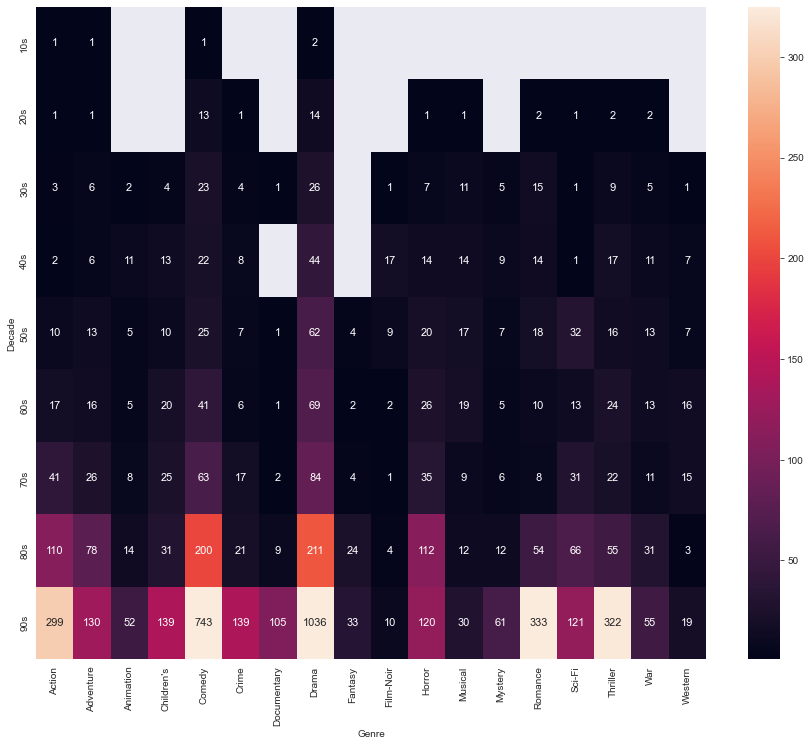

In [33]:


plt.figure(figsize=(15,12))

mask = movies_decades == 0

sns.heatmap(movies_decades, annot=True,annot_kws={'size': 11}, robust=True,fmt='.0f',mask=mask)
plt.xlabel('Genre')
plt.ylabel('Decade')
plt.show()

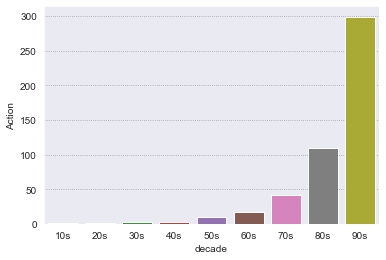

<Figure size 1080x864 with 0 Axes>

In [42]:
sns.barplot(x='decade',y='Action',data=mov,orient='v')
plt.figure(figsize=(15,12))
plt.show()

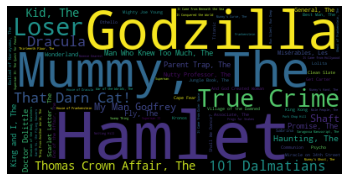

In [35]:

from wordcloud import WordCloud, STOPWORDS
text = movies['title'].value_counts().to_dict()

wordcloud = WordCloud().generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



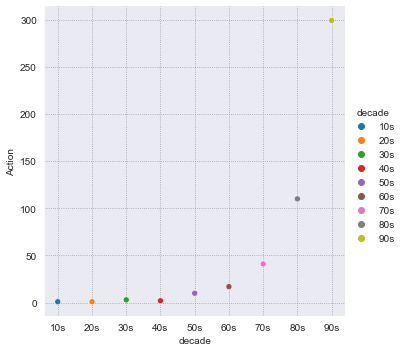

In [45]:
sns.relplot(data=mov, x ='decade',y='Action',hue = 'decade')


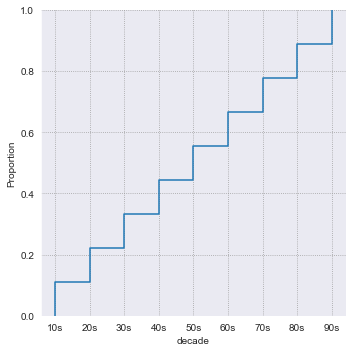

In [46]:
sns.displot(data=mov,x='decade',kind="ecdf")

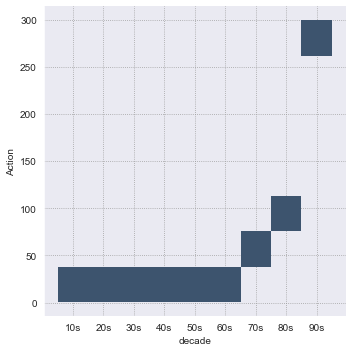

In [47]:
sns.displot(data=mov,x='decade',y='Action')

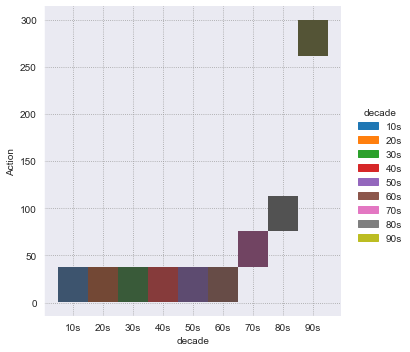

In [48]:
sns.displot(data=mov,x='decade',y='Action', hue='decade')

ValueError: num must be 1 <= num <= 9, not 10

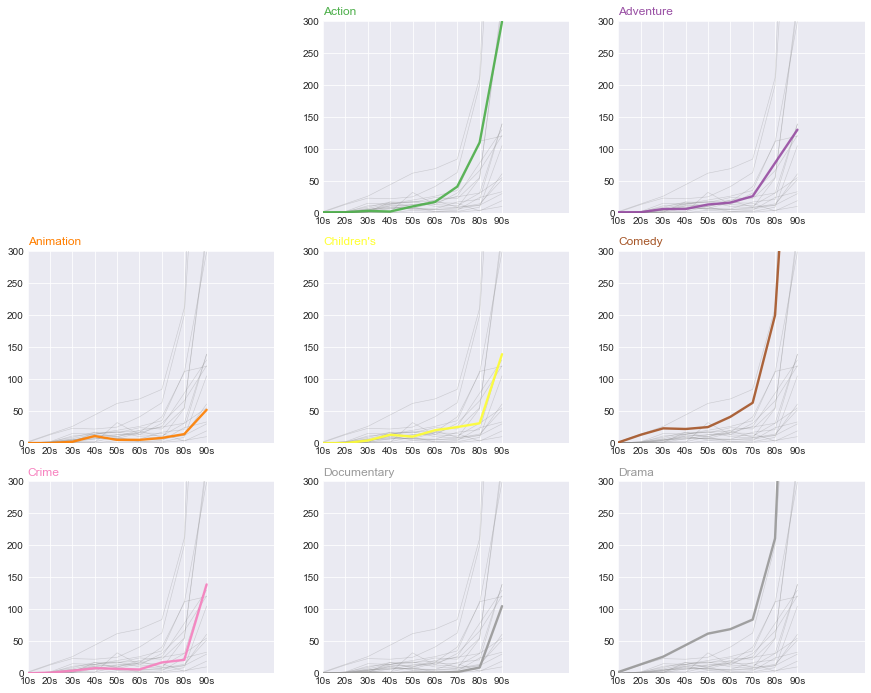

In [52]:
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,12)) 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=1
for column in mov.drop(['decade'], axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every group, but discrete
    for v in mov.drop('decade', axis=1):
        plt.plot(mov['decade'], mov[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(mov['decade'], mov[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # limits for every chart
    plt.xlim(0,11)
    plt.ylim(0,300)
 
  
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

# general title
plt.suptitle("How moveis genre improve during the decades?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()